# Udemy Courses Data Analysis

# This project analyzes Udemy online course data to uncover trends in pricing, subscriber count, course content, and subject categories. It # serves as a full data analysis project to demonstrate skills in data cleaning, visualization, and insight generation.

# Main Objectives:

### Understand course trends by subject, level, price, and popularity
### Explore relationships between reviews, lectures, and subscribers
### Apply data cleaning and exploratory data analysis techniques
### Tools Used: Python, Pandas, NumPy, Seaborn, Matplotlib



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv('udemy_courses_clean.csv')

In [3]:
df.tail()

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
3678,3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,Learn jQuery Scratch Master JavaScript library
3679,3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,Design WordPress Website Coding
3680,3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,Learn Build Polymer
3681,3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,CSS Animations Create Amazing Effects Website
3682,3682,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2 hours,2014-09-28T19:51:11Z,Web Development,MODX CMS Build Websites Beginners Guide


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3683 non-null   int64 
 1   course_id            3683 non-null   int64 
 2   course_title         3683 non-null   object
 3   url                  3683 non-null   object
 4   is_paid              3683 non-null   object
 5   price                3683 non-null   object
 6   num_subscribers      3683 non-null   int64 
 7   num_reviews          3683 non-null   int64 
 8   num_lectures         3683 non-null   int64 
 9   level                3683 non-null   object
 10  content_duration     3683 non-null   object
 11  published_timestamp  3683 non-null   object
 12  subject              3683 non-null   object
 13  clean_course_title   3663 non-null   object
dtypes: int64(5), object(9)
memory usage: 403.0+ KB


In [5]:
df.isnull().sum()

Unnamed: 0              0
course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
clean_course_title     20
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# subject

In [7]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: count, dtype: int64

In [8]:
len(df['subject'].unique())

4

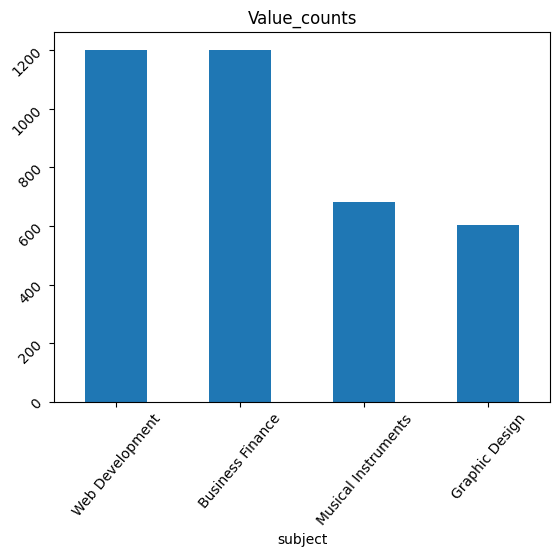

In [9]:
df['subject'].value_counts().plot(kind='bar')
plt.xticks(rotation=50)
plt.yticks(rotation=45)
plt.title('Value_counts')
plt.show()

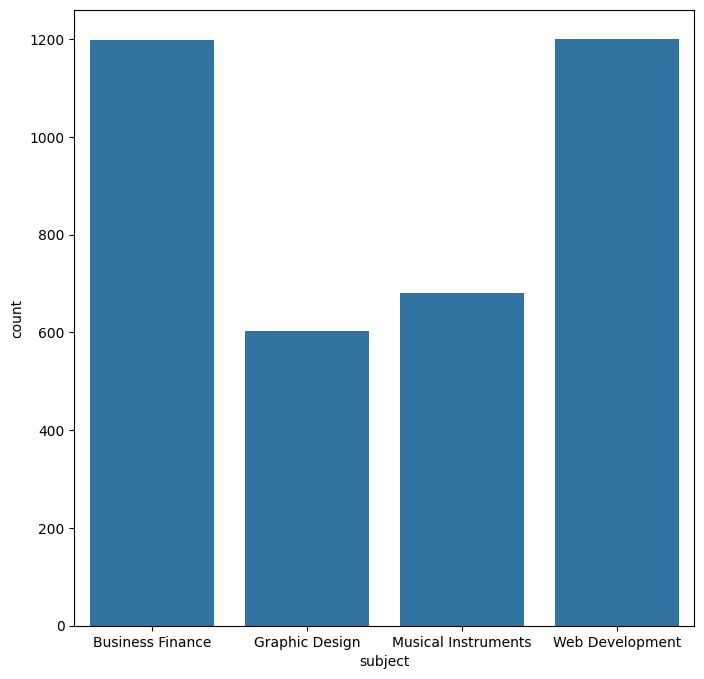

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['subject'],data=df)
plt.show()

# num_subscribers

In [11]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

In [12]:
df.num_subscribers.mean()

np.float64(3193.3711648112953)

In [13]:
df.num_subscribers.max()

np.int64(268923)

In [14]:
df.num_subscribers.min()

np.int64(0)

In [15]:
df.num_subscribers.sum()

np.int64(11761186)

In [16]:
# which course has the max subscribers

In [17]:
df.num_subscribers.idxmax()

2832

In [18]:
# get the location 

In [19]:
df.iloc[2832]

Unnamed: 0                                                          2832
course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
clean_course_title                       Learn HTML

# Level

In [20]:
df.head()

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options


In [21]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [22]:
df['level'].value_counts()

level
All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
52                       1
Name: count, dtype: int64

In [23]:
f=(df['level']=='52')

In [24]:
df[f]

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
2066,2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",https://www.udemy.com/learnguitartoworship/,TRUE,30,1463,29,52,Beginner Level,3 hours,Musical Instruments,Learn Classical Guitar Technique play Spanish ...


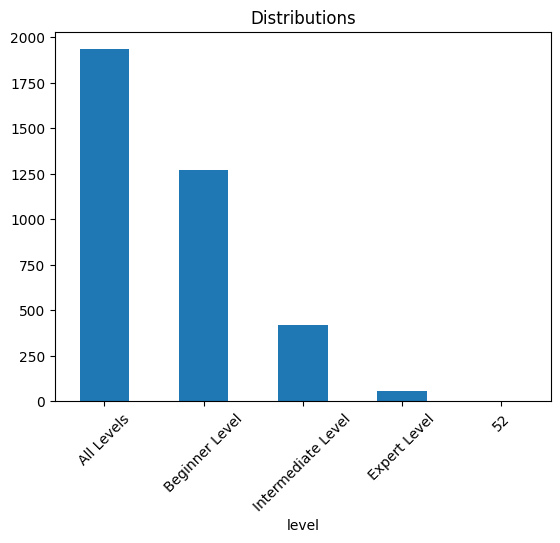

In [25]:
df['level'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Distributions')
plt.show()

In [26]:
df.groupby('level')['num_subscribers'].sum()

level
52                         30
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

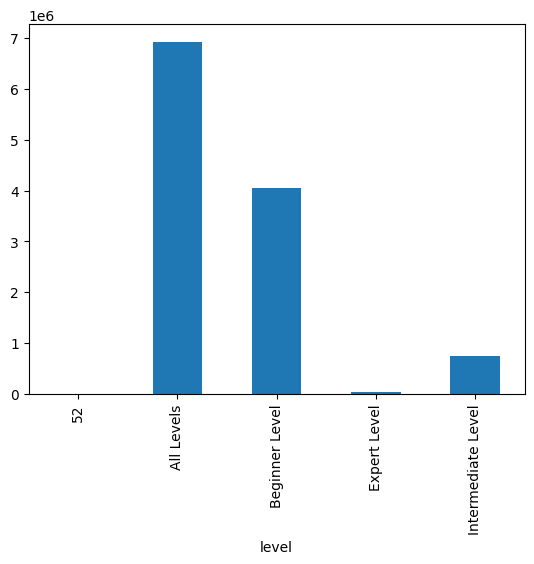

In [27]:
df.groupby('level')['num_subscribers'].sum().plot(kind='bar')
plt.show()

In [28]:
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
                     52                      1
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: count, dtype: int64

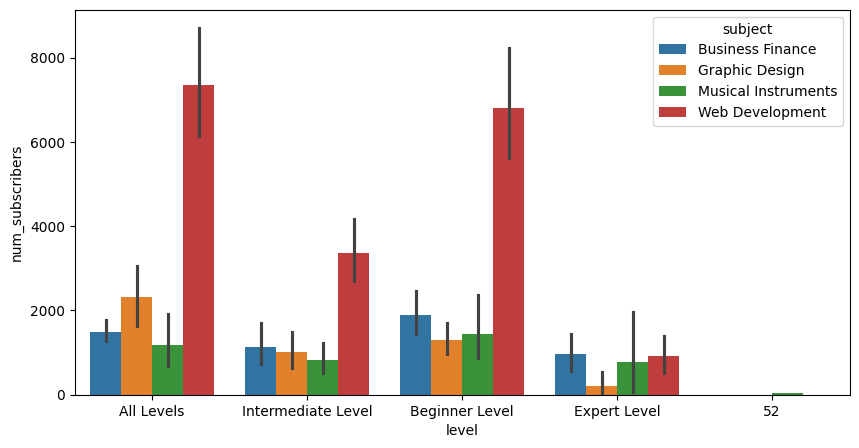

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='level',y='num_subscribers',data=df,hue='subject')
plt.show()

In [30]:
df.head()

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options


In [31]:
def func(x):
    plt.figure(figsize=(10,5))
    sns.barplot(x='level',y=x,data=df,hue='subject')
    plt.title('plot of {} per level per subject'.format(x))
    plt.show()
    #pie chart
    plt.figure(figsize=(8,5))
    df.groupby('level')[x].sum().plot(kind='pie')
    plt.title('plot of {} per level'.format(x))
    plt.show()

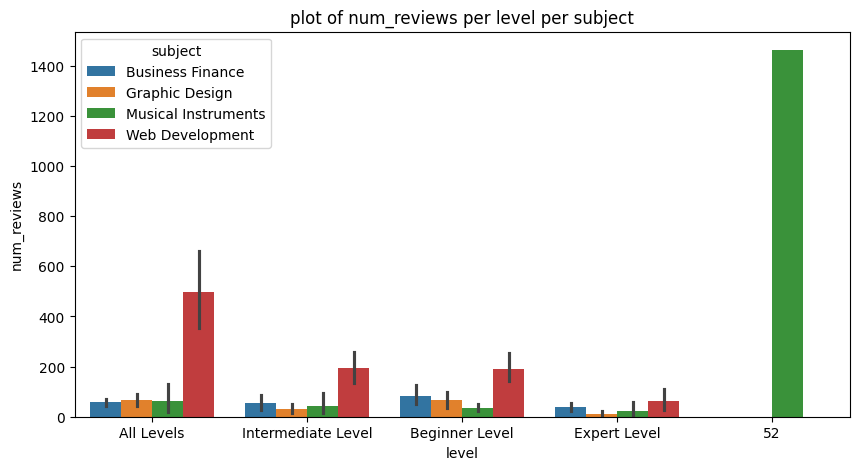

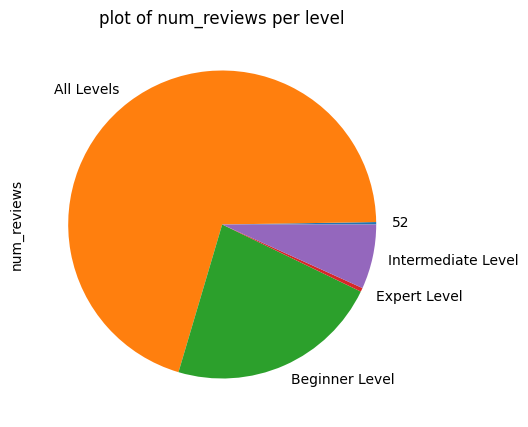

In [32]:
func('num_reviews')

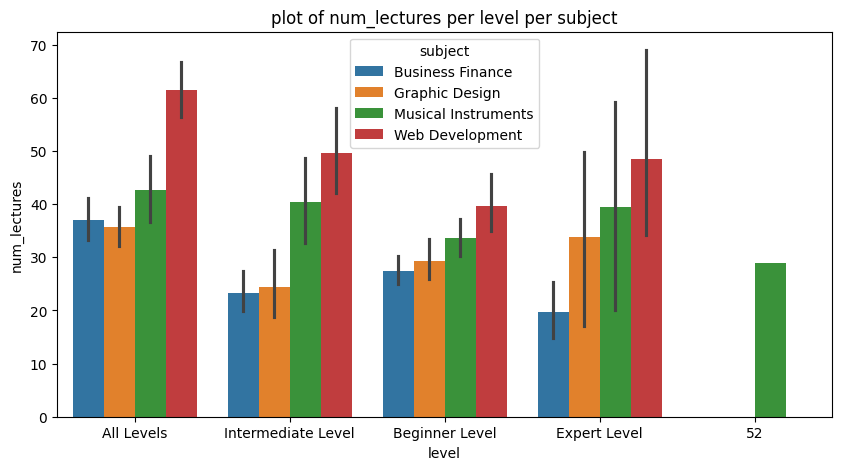

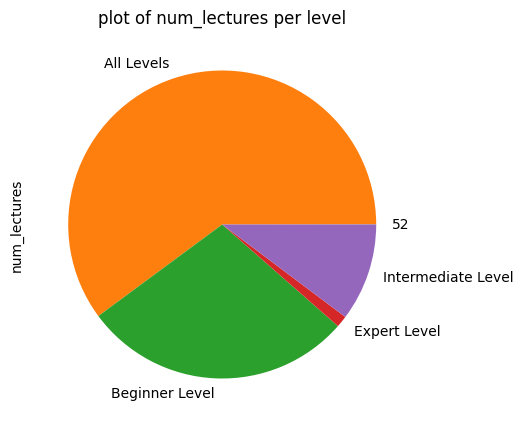

In [33]:
func('num_lectures')

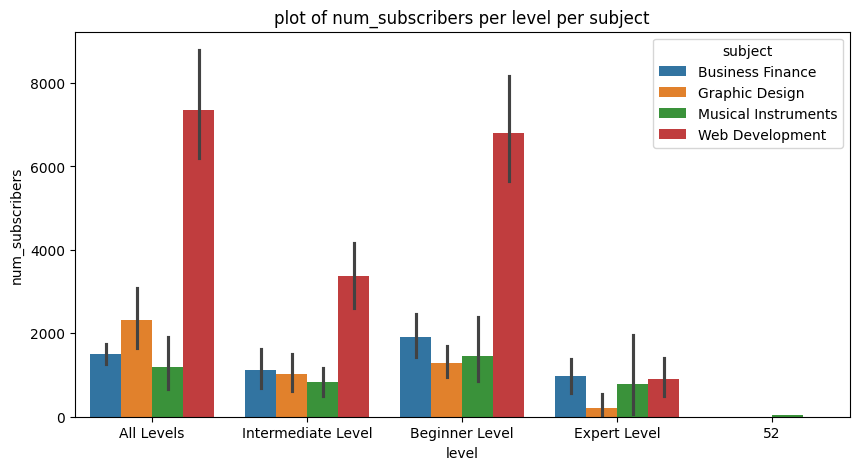

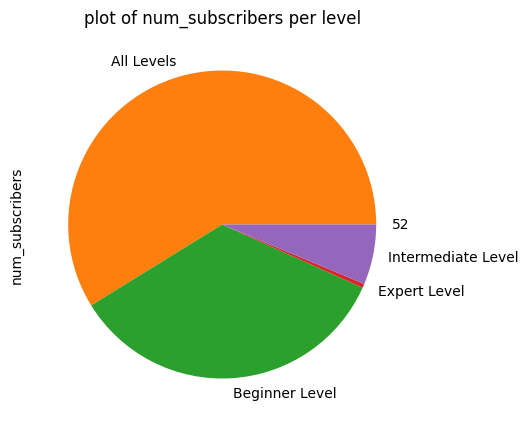

In [34]:
func('num_subscribers')

In [35]:
df['price'].dtype

dtype('O')

In [36]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [37]:
df['price']=df['price'].str.replace('Free|TRUE','0',regex=True)

In [38]:
df['price']=df['price'].astype(float)

In [39]:
df['price'].mean()

np.float64(65.99239750203638)

In [40]:
df.groupby('subject')['price'].sum()

subject
Business Finance       82040.0
Graphic Design         34870.0
Musical Instruments    33700.0
Web Development        92440.0
Name: price, dtype: float64

In [41]:
df['price'].max()

np.float64(200.0)

In [42]:
df['price'].idxmax()

0

In [43]:
df.iloc[0]

Unnamed: 0                                                             0
course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
clean_course_title                    Ultimate Inve

In [44]:
df['profit']=df['price']*df['num_subscribers']

In [80]:
df['profit'].tolist(5)

TypeError: tolist() takes 1 positional argument but 2 were given

In [46]:
df['profit'].max()

np.float64(24316800.0)

In [47]:
df['profit'].idxmax()

3235

In [48]:
df.iloc[3235]

Unnamed: 0                                                          3235
course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
clean_course_title                                W

In [49]:
df.columns

Index(['Unnamed: 0', 'course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject',
       'clean_course_title', 'profit'],
      dtype='object')

In [50]:
df['is_paid'].value_counts()

is_paid
True                                           2738
TRUE                                            634
False                                           264
FALSE                                            46
https://www.udemy.com/learnguitartoworship/       1
Name: count, dtype: int64

In [51]:
paid_dic={'True':True,'TRUE':True,'False':False,'FALSE':False,'https://www.udemy.com/learnguitartoworship/':True}


In [52]:
df['is_paid']=df['is_paid'].map(paid_dic)

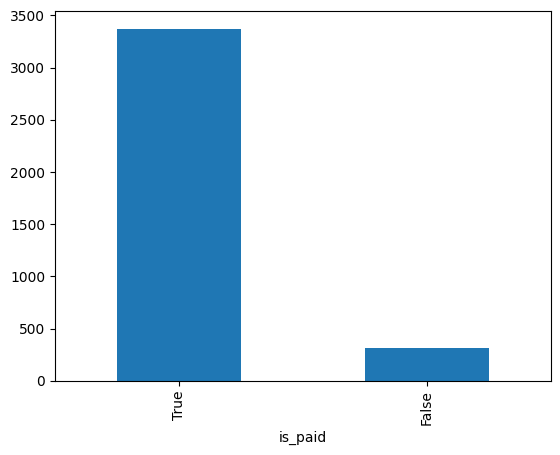

In [53]:
df['is_paid'].value_counts().plot(kind='bar')
plt.show()

In [54]:
#using seaborn

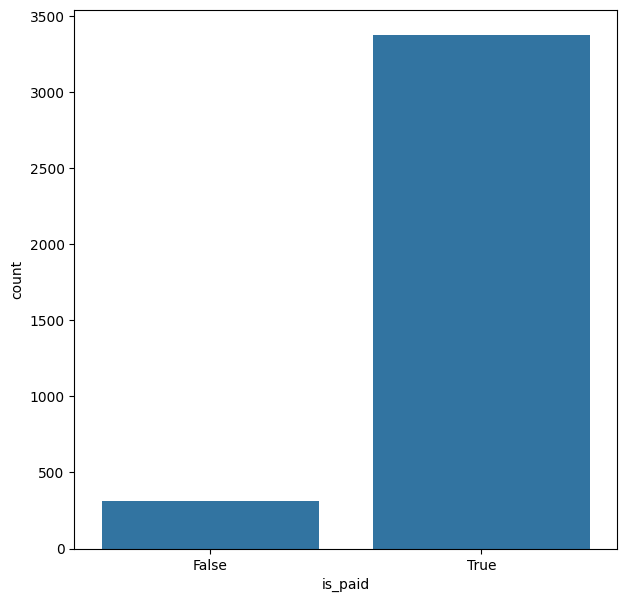

In [55]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['is_paid'])
plt.show()

In [56]:
df.groupby('subject')['is_paid'].value_counts()

subject              is_paid
Business Finance     True       1103
                     False        96
Graphic Design       True        568
                     False        35
Musical Instruments  True        635
                     False        46
Web Development      True       1067
                     False       133
Name: count, dtype: int64

In [57]:
#Length of the Course Title

In [58]:
df['course_title_length']=df['course_title'].str.len()

In [59]:
df['course_title_length'].idxmax()

2191

In [60]:
df.iloc[2191]

Unnamed: 0                                                          2191
course_id                                                         286898
course_title           Aprende a tocar el Acordeón 'de oído y con téc...
url                    https://www.udemy.com/aprende-los-secretos-de-...
is_paid                                                             True
price                                                               75.0
num_subscribers                                                      158
num_reviews                                                           17
num_lectures                                                          59
level                                                         All Levels
content_duration                                               2.5 hours
published_timestamp                                 2014-07-28T13:55:43Z
subject                                              Musical Instruments
clean_course_title     Aprende tocar el Acorden de 

In [61]:
df

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title,profit,course_title_length
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course,429400.0,34
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice,209400.0,59
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants,97830.0,56
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017,232845.0,50
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options,255200.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100.0,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,Learn jQuery Scratch Master JavaScript library,104000.0,56
3679,3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25.0,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,Design WordPress Website Coding,7650.0,55
3680,3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40.0,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,Learn Build Polymer,20520.0,29
3681,3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50.0,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,CSS Animations Create Amazing Effects Website,15000.0,54


In [62]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3678    2016-06-14T17:36:46Z
3679    2017-03-10T22:24:30Z
3680    2015-12-30T16:41:42Z
3681    2016-08-11T19:06:15Z
3682    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3683, dtype: object

In [63]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3678    [2016-06-14, 17:36:46Z]
3679    [2017-03-10, 22:24:30Z]
3680    [2015-12-30, 16:41:42Z]
3681    [2016-08-11, 19:06:15Z]
3682    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3683, dtype: object

In [64]:
# the Date we need just year/month/day 
#Feature Engineer

In [65]:
df['Date']=df['published_timestamp'].str.split('T').str.get(0)

In [70]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [68]:
df['Date']=df['Date'].str.replace('3 hours','2017-01-12')

In [69]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           3683 non-null   int64         
 1   course_id            3683 non-null   int64         
 2   course_title         3683 non-null   object        
 3   url                  3683 non-null   object        
 4   is_paid              3683 non-null   bool          
 5   price                3683 non-null   float64       
 6   num_subscribers      3683 non-null   int64         
 7   num_reviews          3683 non-null   int64         
 8   num_lectures         3683 non-null   int64         
 9   level                3683 non-null   object        
 10  content_duration     3683 non-null   object        
 11  published_timestamp  3683 non-null   object        
 12  subject              3683 non-null   object        
 13  clean_course_title   3663 non-nul

In [72]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [73]:
df.head()

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title,profit,course_title_length,Date,Year,Month,Day
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course,429400.0,34,2017-01-18,2017,1,18
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice,209400.0,59,2017-03-09,2017,3,9
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants,97830.0,56,2016-12-19,2016,12,19
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017,232845.0,50,2017-05-30,2017,5,30
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options,255200.0,44,2016-12-13,2016,12,13


In [74]:
df['Year'].unique()

array([2017, 2016, 2014, 2015, 2013, 2012, 2011], dtype=int32)

In [75]:
df.groupby('Year')['num_subscribers'].sum()

Year
2011     119028
2012     555339
2013    1723438
2014    1930406
2015    3475324
2016    2966644
2017     991007
Name: num_subscribers, dtype: int64

<Axes: xlabel='Year'>

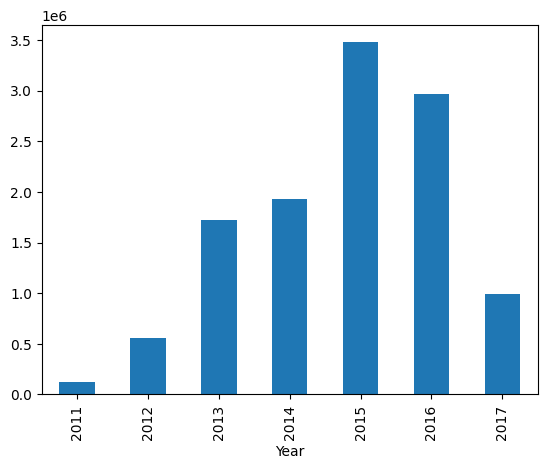

In [76]:
df.groupby('Year')['num_subscribers'].sum().plot(kind='bar')

In [ ]:
# 2015 Was the highest  with number of subscribers 

In [77]:
df.groupby('Month')['num_subscribers'].sum()

Month
1      926571
2     1171038
3     1169973
4     1098957
5      758727
6     1114457
7      818371
8      889368
9      848214
10    1197429
11    1024601
12     743480
Name: num_subscribers, dtype: int64

<Axes: xlabel='Month'>

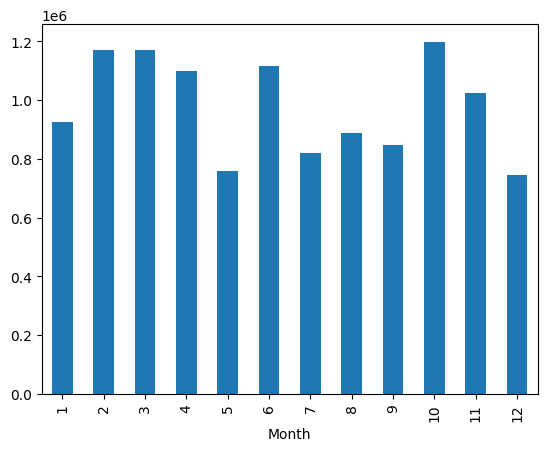

In [78]:
df.groupby('Month')['num_subscribers'].sum().plot(kind='bar')

/var/folders/3f/lp5p1nqx46n2nww8ksnmbkw80000gp/T/ipykernel_89016/3207291512.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year',y='num_subscribers',data=df,hue='subject',ci=None)


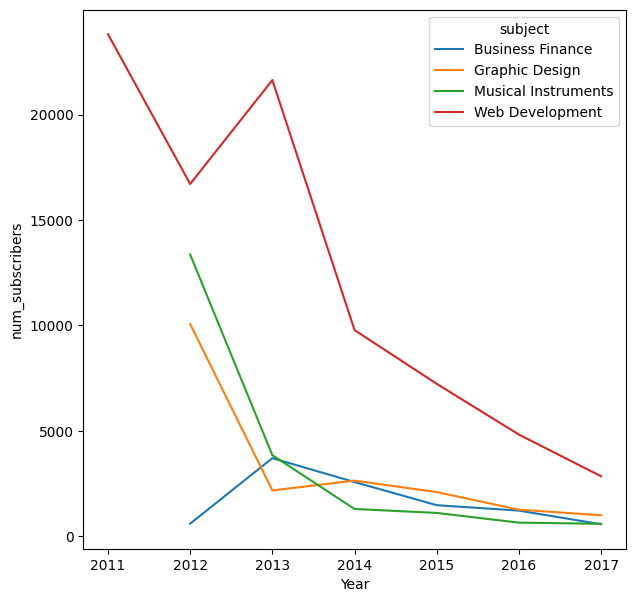

In [79]:
plt.figure(figsize=(7,7))
sns.lineplot(x='Year',y='num_subscribers',data=df,hue='subject',ci=None)
plt.show()